In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_ta as ta
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import json
from bs4 import BeautifulSoup
from FinMind.data import DataLoader

def Stock_Capital(stock_id,start_date,end_date):
    api = DataLoader()
    # api.login_by_token(api_token='token')
    # api.login(user_id='user_id',password='password')
    df_tick = api.taiwan_stock_daily(
        stock_id=stock_id,
        start_date=start_date,
        end_date=end_date
    )
    df_tick = df_tick.set_index('date')
    df_tick

    # Institutional Investor
    api = DataLoader()

    df = api.taiwan_stock_institutional_investors(
        stock_id=stock_id,
        start_date=start_date,
        end_date=end_date
    )
    df['net'] = df['buy'] - df['sell']
    df.drop(df[df['name'] == 'Foreign_Dealer_Self'].index, inplace=True)
    df = df.set_index('date')
    df

    df_tick['DS_buy'] = df[df['name'] == 'Dealer_self'].buy
    df_tick['DS_sell'] = df[df['name'] == 'Dealer_self'].sell
    df_tick['DS_net'] = df[df['name'] == 'Dealer_self'].net

    df_tick['FI_buy'] = df[df['name'] == 'Foreign_Investor'].buy
    df_tick['FI_sell'] = df[df['name'] == 'Foreign_Investor'].sell
    df_tick['FI_net'] = df[df['name'] == 'Foreign_Investor'].net

    df_tick['IT_buy'] = df[df['name'] == 'Investment_Trust'].buy
    df_tick['IT_sell'] = df[df['name'] == 'Investment_Trust'].sell
    df_tick['IT_net'] = df[df['name'] == 'Investment_Trust'].net

    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates

    # Assuming 'df' is your DataFrame with columns: 'date', 'stock_close', 'foreign_investment', 'dealer_self'

    # Creating the figure and axes
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plotting stock close line
    ax1.plot(df_tick.index, df_tick['close'], color='blue', label='Stock Close')
    ax1.set_ylabel('Stock Close', color='blue')

    # Creating a second y-axis for investment volume
    ax2 = ax1.twinx()
    ax2.bar(df_tick.index, df_tick['FI_net'], color='green', label='Foreign Investment')
    ax2.bar(df_tick.index, df_tick['DS_net'], color='orange', label='Dealer Self')
    ax2.bar(df_tick.index, df_tick['IT_net'], color='red', label='Investment Trust')
    ax2.set_ylabel('Investment Volume', color='black')

    # Formatting the plot
    ax1.set_xlabel('Date')
    ax1.set_title(f'Stock - {stock_id} Price with Institution Cpaital Relation')

    # Combining the legends from both axes
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='lower right')

    # Using AutoDateLocator for automatic date tick placement
    #ax1.xaxis.set_major_locator(mdates.AutoDateLocator())

    # Rotating x-axis tick labels for better readability
    ax1.xaxis.set_tick_params(rotation=45)

    # Displaying the plot
    plt.tight_layout()
    plt.show()

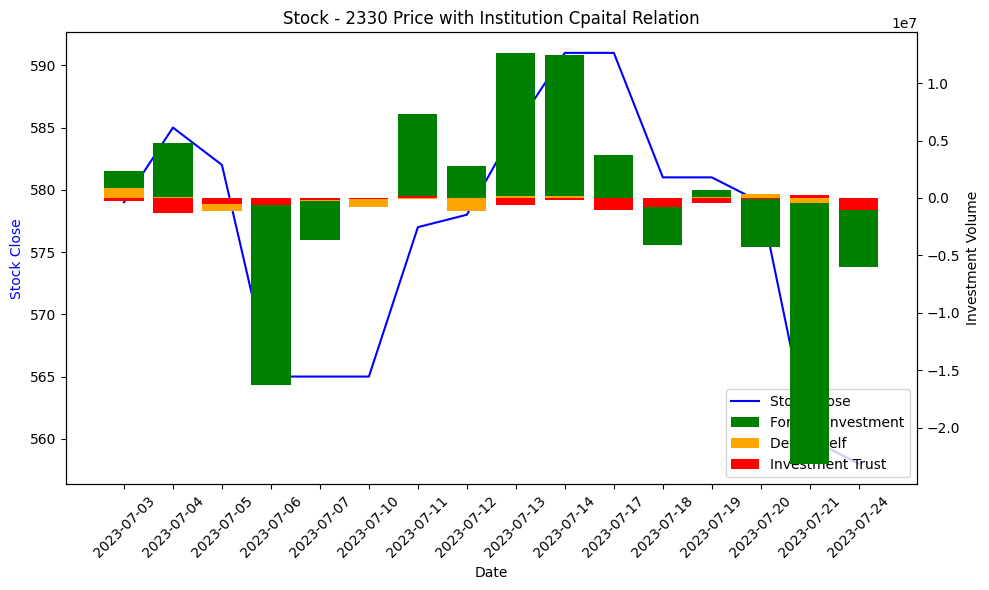

In [3]:
# 3231 / 2382 / 2356
Stock_Capital('2330','2023-07-03','2023-07-24')